<a href="https://colab.research.google.com/github/VaishnaviMishra25/time-series-stock-forecasting/blob/main/Stock_Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload Your Dataset to Colab

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving HistoricalQuotes.csv to HistoricalQuotes (1).csv


Load and Inspect the Dataset

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("HistoricalQuotes.csv")

# Check the structure
print(df.info())
df.head()

# Clean currency columns
for col in [' Close/Last', ' Open', ' High', ' Low']:
    df[col] = df[col].astype(str).str.replace('$', '', regex=False)
    df[col] = pd.to_numeric(df[col])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         2518 non-null   object
 1    Close/Last  2518 non-null   object
 2    Volume      2518 non-null   int64 
 3    Open        2518 non-null   object
 4    High        2518 non-null   object
 5    Low         2518 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.2+ KB
None


 Data Cleaning & Preprocessing

In [ ]:
# Convert date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort data by date
df = df.sort_values('Date')

# Set date as index
df.set_index('Date', inplace=True)

# Check for null values
print(df.isnull().sum())


Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64


Visualize the Time Series

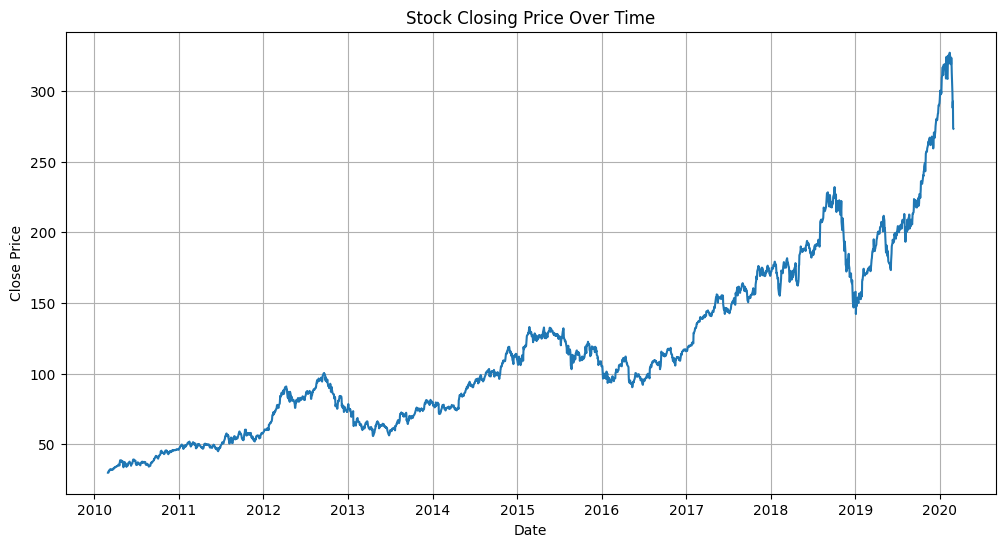

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df[' Close/Last'])
plt.title('Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

Apply Time Series Models

 ARIMA/SARIMA:

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df[' Close/Last'], order=(5,1,0))  # example order
results = model.fit()
df['ARIMA_Pred'] = results.predict(start=100, end=len(df)-1, typ='levels')

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Facebook Prophet:

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3ruj3_mn/e6p9m8ar.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3ruj3_mn/jg254z8i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22329', 'data', 'file=/tmp/tmp3ruj3_mn/e6p9m8ar.json', 'init=/tmp/tmp3ruj3_mn/jg254z8i.json', 'output', 'file=/tmp/tmp3ruj3_mn/prophet_modelkdr4lv2q/prophet_model-20250701080347.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:03:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:03:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


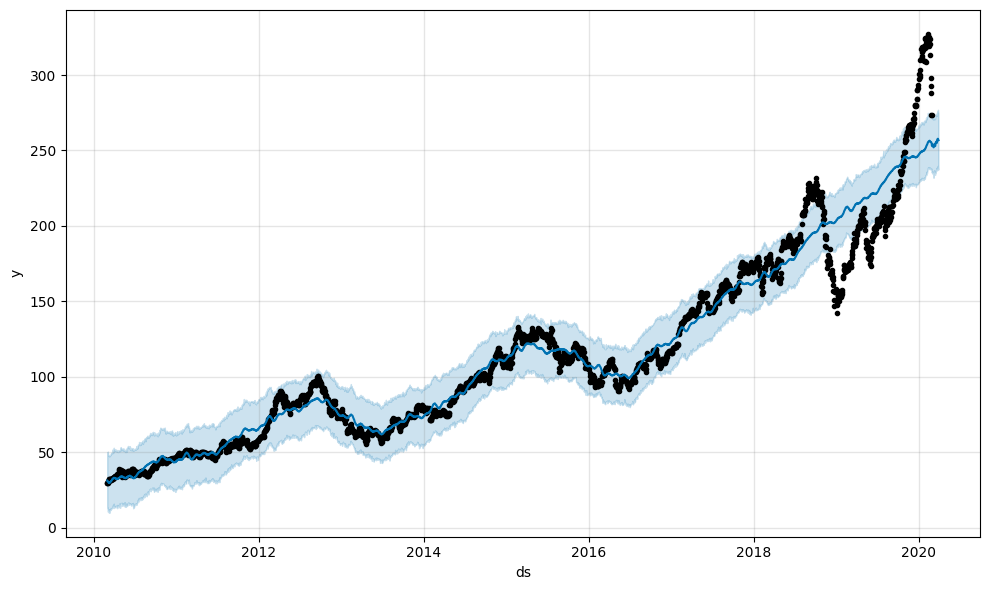

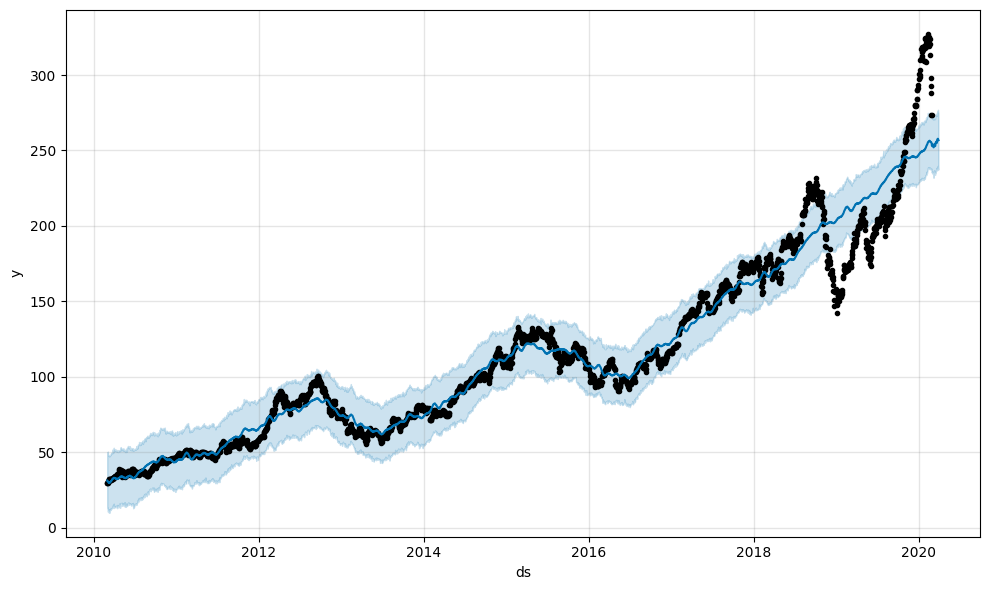

In [ ]:
from prophet import Prophet

df_prophet = df.reset_index()[['Date', ' Close/Last']].rename(columns={'Date': 'ds', ' Close/Last': 'y'})
model = Prophet()
model.fit(df_prophet)
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)
model.plot(forecast)

 calculated the Mean Squared Error (MSE) and Mean Absolute Error (MAE) for the ARIMA model first.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Ensure both series have the same length and no NaNs
actual = df[' Close/Last'][~np.isnan(df['ARIMA_Pred'])]
predicted = df['ARIMA_Pred'][~np.isnan(df['ARIMA_Pred'])]


mse = mean_squared_error(actual, predicted)
mae = mean_absolute_error(actual, predicted)

print(f"ARIMA MSE: {mse}")
print(f"ARIMA MAE: {mae}")

ARIMA MSE: 4.519975921120886
ARIMA MAE: 1.3508392846280712


Apply Prophet Model (By Facebook)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3ruj3_mn/dh9k5nbd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3ruj3_mn/d4njxmbx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42586', 'data', 'file=/tmp/tmp3ruj3_mn/dh9k5nbd.json', 'init=/tmp/tmp3ruj3_mn/d4njxmbx.json', 'output', 'file=/tmp/tmp3ruj3_mn/prophet_modeljpqm4qy6/prophet_model-20250701080755.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:07:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:07:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


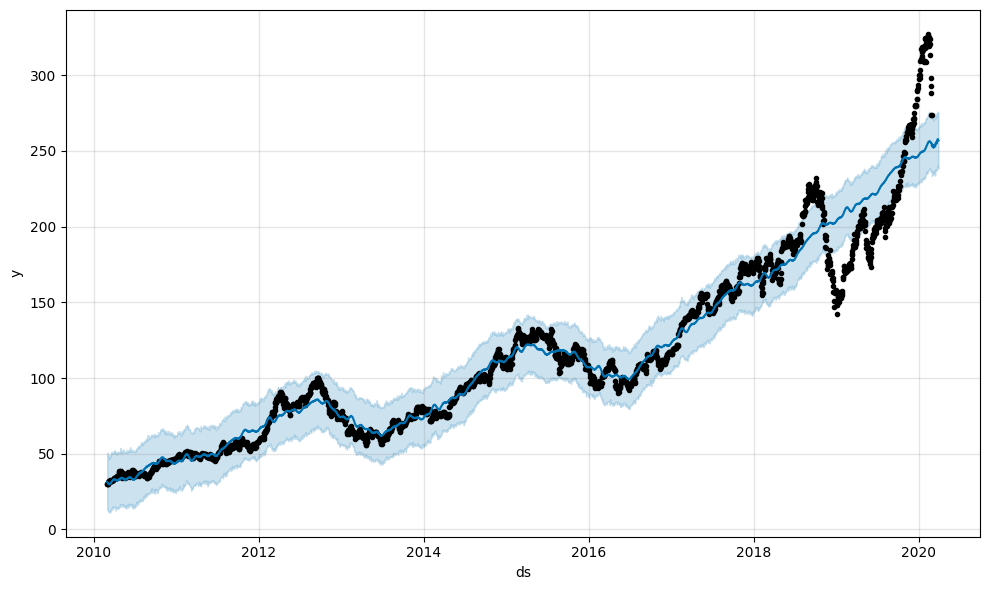

In [ ]:
from prophet import Prophet
import pandas as pd

# Prepare data for Prophet
df_prophet = df.reset_index()[['Date', ' Close/Last']].rename(columns={'Date': 'ds', ' Close/Last': 'y'})

# Initialize and fit model
model = Prophet()
model.fit(df_prophet)

# Make future dataframe (next 30 days)
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Plot forecast
model.plot(forecast);


 Evaluate Prophet:

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Align predicted and actual values
actual = df_prophet['y']
predicted = forecast['yhat'][:len(actual)]

mse = mean_squared_error(actual, predicted)
mae = mean_absolute_error(actual, predicted)

print(f"Prophet MSE: {mse}")
print(f"Prophet MAE: {mae}")


Prophet MSE: 206.25477198156264
Prophet MAE: 8.812074549875078


Import Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import LSTM, Dense


Prepare the Dataset

In [ ]:
# Use only the 'Close' price
data = df[[' Close/Last']].copy()
data.columns = ['Close']  # Clean column name

# Normalize data between 0 and 1
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Convert into sequences for LSTM
def create_sequences(dataset, time_step=60):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i-time_step:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_sequences(scaled_data, time_step)

# Reshape input to LSTM [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)


Train-Test Split

In [ ]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


Build and Train the LSTM Model

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 0.0119
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 1.5884e-04
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 1.3486e-04
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 1.5623e-04
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 1.4932e-04
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - loss: 1.4068e-04
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - loss: 1.3476e-04
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 1.5337e-04
Epoch 9/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - loss: 1.3405e-04
Epoch 10/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 1.2061e-04


Make Predictions

In [ ]:
# Predict and inverse scale
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted.reshape(-1, 1))
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


Evaluate LSTM Model

In [ ]:
mse = mean_squared_error(actual_prices, predicted_prices)
print(f"LSTM MSE: {mse}")


LSTM MSE: 68.63093279336321


Plot Actual vs Predicted

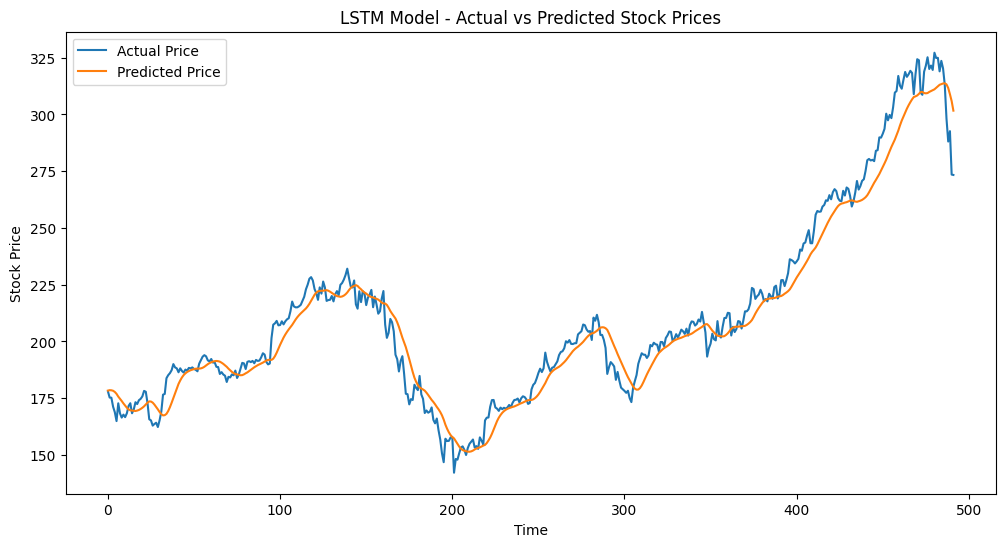

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(actual_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.title("LSTM Model - Actual vs Predicted Stock Prices")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


# ===== Prophet Forecasting =====

In [ ]:
import pandas as pd

model_scores = {
    'Model': ['ARIMA', 'Prophet', 'LSTM'],
    'MSE': [arima_mse, prophet_mse, lstm_mse],
    'MAE': [arima_mae, prophet_mae, None]  # LSTM MAE optional
}

results_df = pd.DataFrame(model_scores)
print(results_df)
